<a href="https://colab.research.google.com/github/mpjuarez/aprendizaje-maquina-taller1/blob/main/Aprendizaje_maq_taller1v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [4]:
#Importar librerías
import pandas as pd
from urllib.parse import quote_plus
import numpy as np
import chardet
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pytz
import os

Cargar dataset datatrigo.csv

In [5]:

## 1. Carga de datos
repo_path = "aprendizaje-maquina-taller1"
repo_url = "https://github.com/mpjuarez/aprendizaje-maquina-taller1.git"
if not os.path.exists(repo_path):
    !git clone {repo_url}
else:
    %cd {repo_path}
    !git pull

Cloning into 'aprendizaje-maquina-taller1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 4.39 KiB | 4.39 MiB/s, done.


In [10]:
# Importar fuente de datos
ruta = '/content/aprendizaje-maquina-taller1/dataTrigo.csv'
# Cargar el archivo CSV con el delimitador actual ;
data = pd.read_csv(ruta, sep=';')

# Guardar el archivo CSV con el delimitador cambiado a ,
data.to_csv('dataTrigo_coma.csv', index=False)
data = pd.read_csv('dataTrigo_coma.csv')

Tamaño del dataset

In [11]:
data.shape

(210, 8)

El dataset tiene un tamaño de 210 filas y 8 columnas.

Mostrar los 5 primeros registros

In [12]:
data.head(5)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,NaN,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Visión general del dataser

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       209 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


Resumne de estadisticas

In [14]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,209.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.561531,0.870999,5.602724,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.308688,0.023629,0.589074,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,0.000000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.253000,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.350000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.730000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


visualización de datos

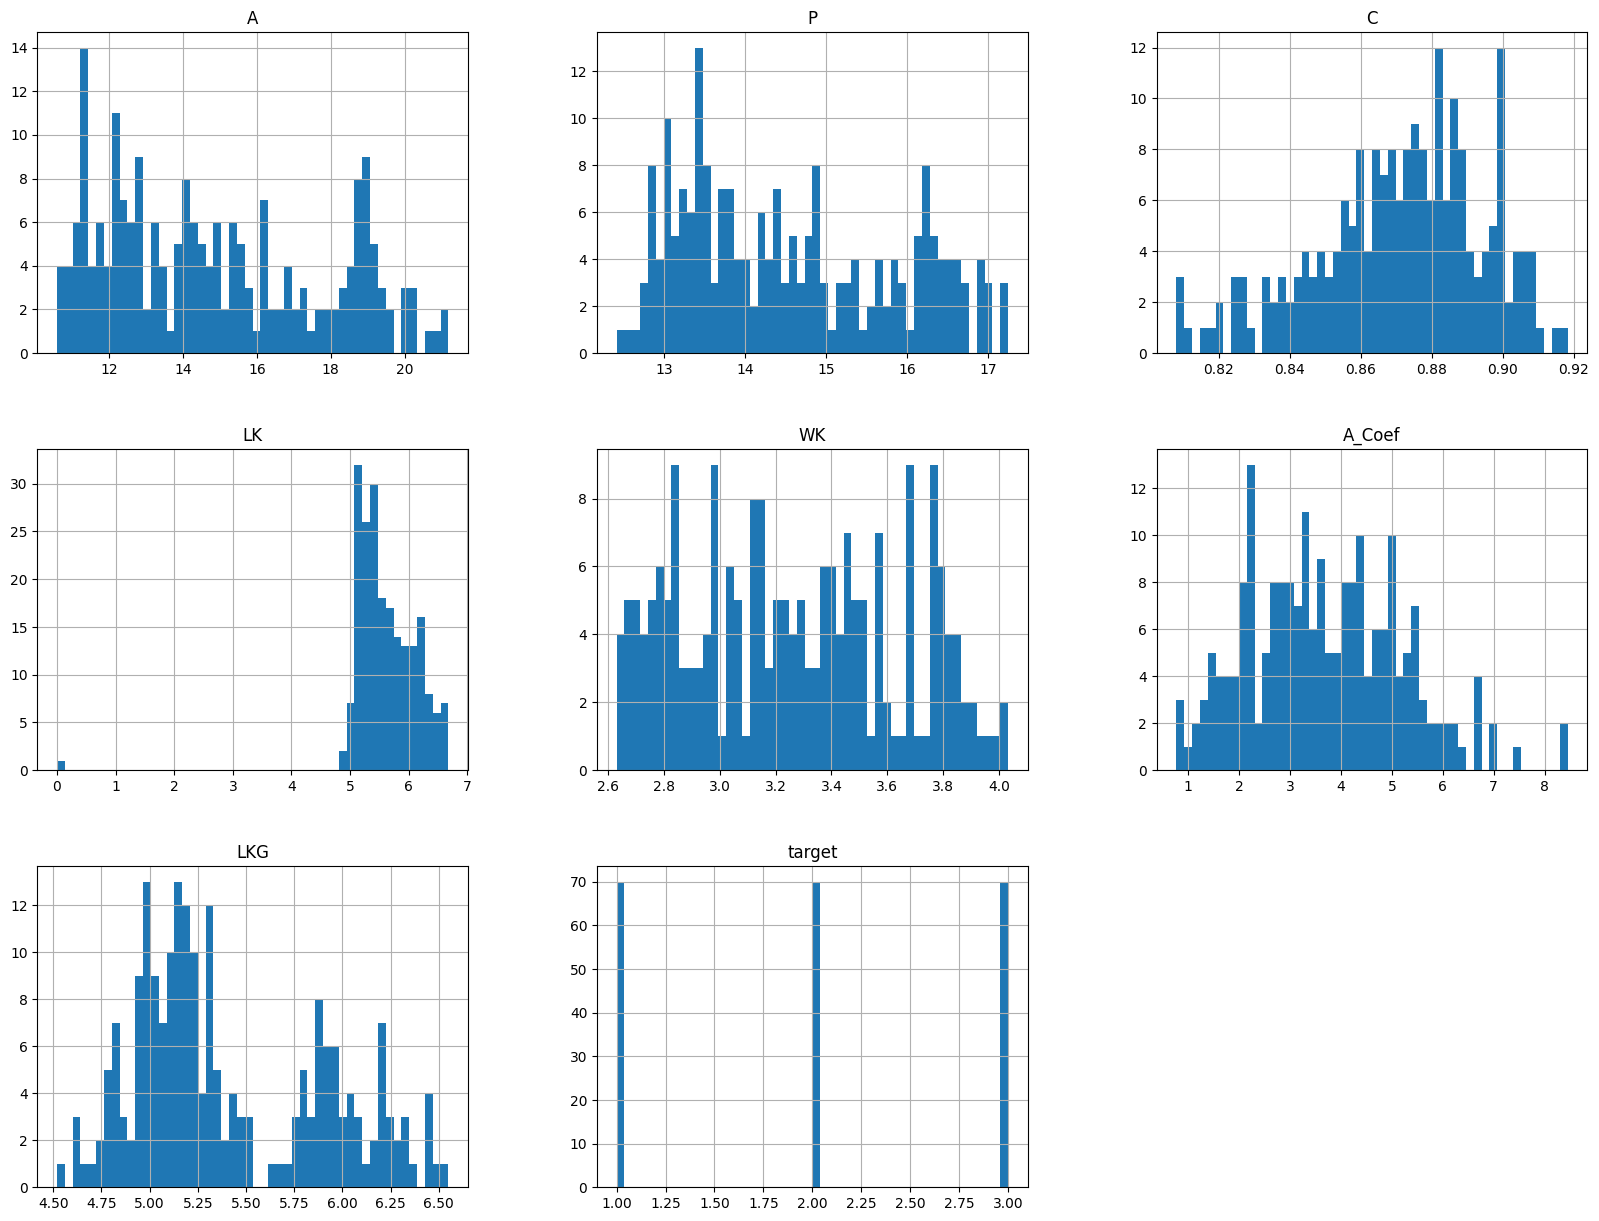

In [16]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
import seaborn as sns

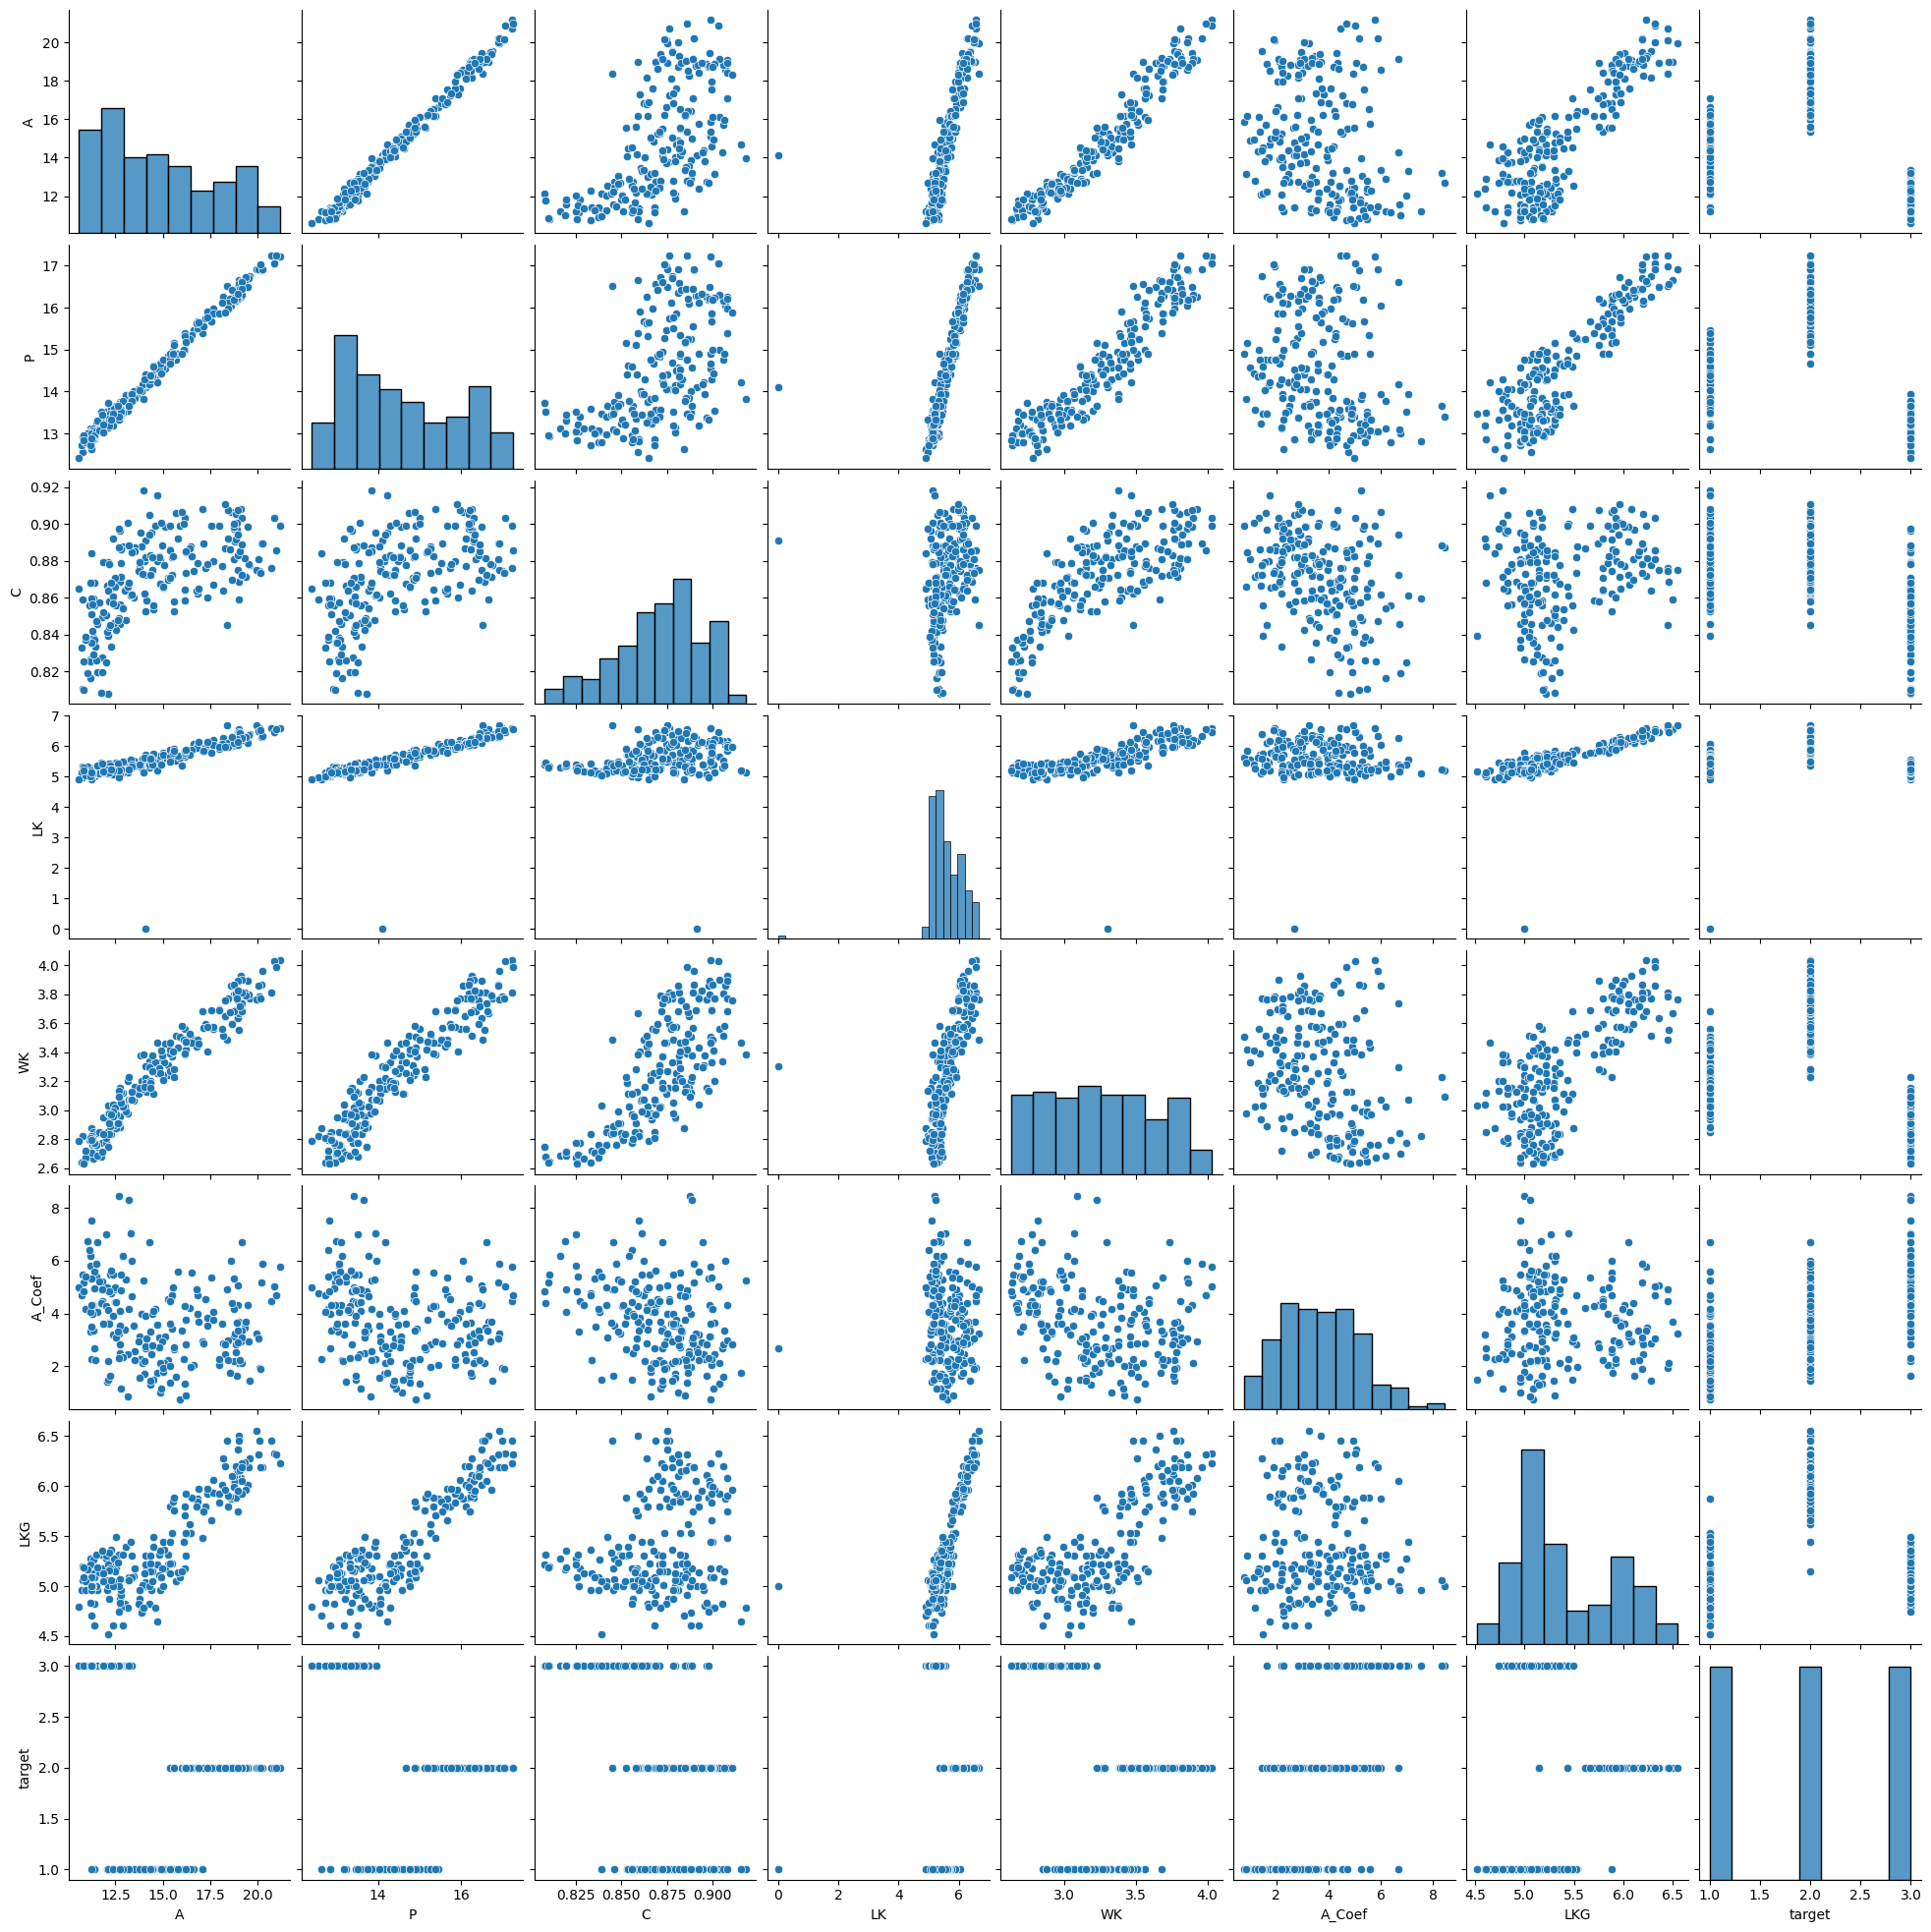

In [18]:
sns.pairplot(data)

<ipython-input-19-5eca0a8ee456>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data.A_Coef,palette='rainbow')


<Axes: ylabel='A_Coef'>

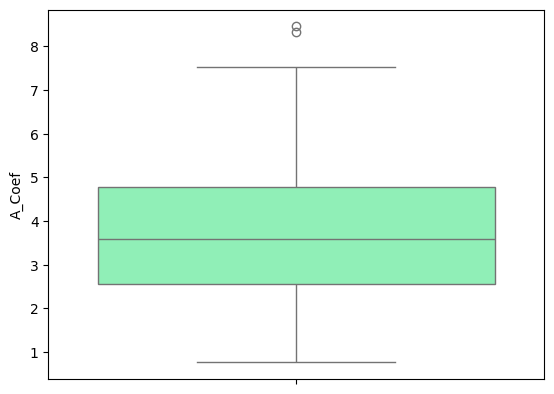

In [19]:
sns.boxplot(data=data.A_Coef,palette='rainbow')

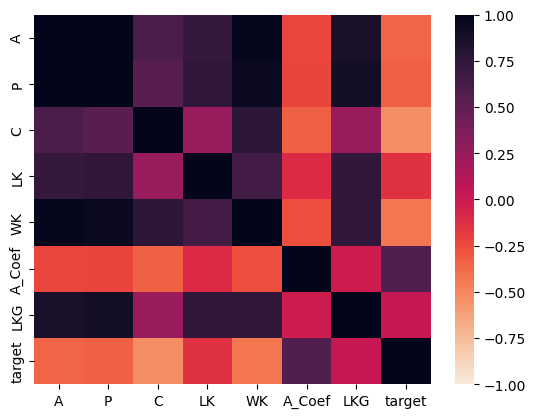

In [20]:
#import seaborn as sns

sns.heatmap(data.corr(), vmin=-1, vmax=1,
annot=False,cmap="rocket_r")
plt.show()

<Axes: xlabel='LK', ylabel='count'>

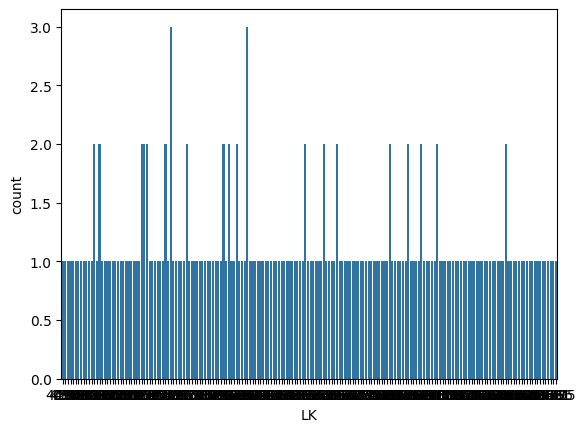

In [21]:
sns.countplot(data=data, x= "LK" )

<Axes: ylabel='LK'>

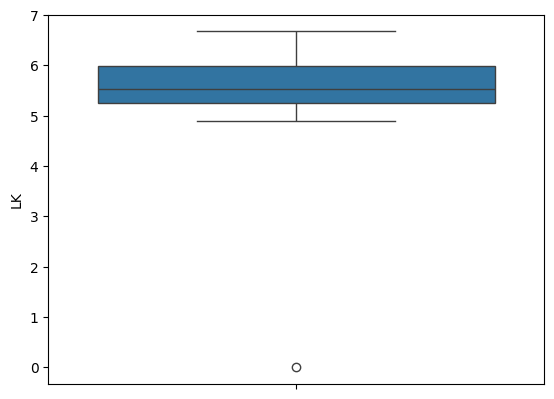

In [22]:
sns.boxplot(data=data, y="LK", )

<Axes: ylabel='A_Coef'>

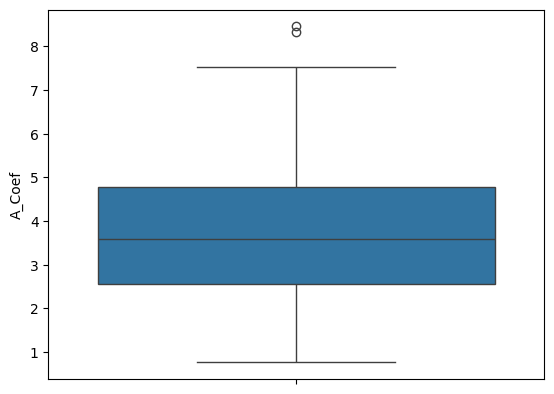

In [23]:
sns.boxplot(data=data, y="A_Coef", )

<Axes: xlabel='LK'>

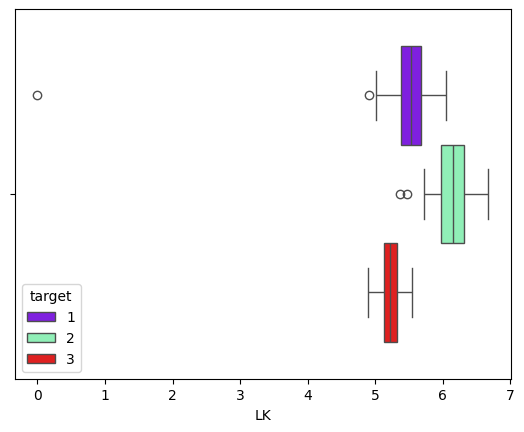

In [24]:
sns.boxplot(x="LK", hue="target",data=data,palette='rainbow')

<Axes: xlabel='A', ylabel='P'>

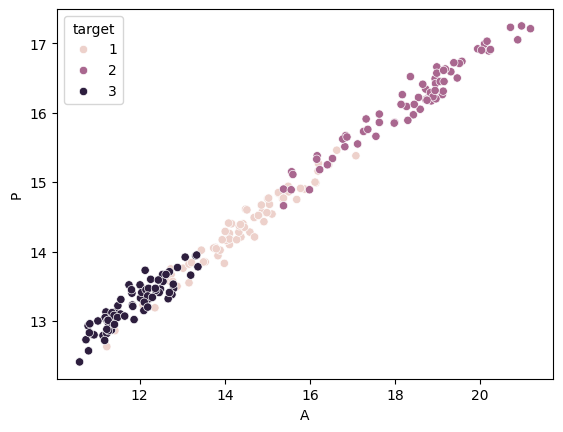

In [25]:
sns.scatterplot (data=data, x= "A", y="P", hue="target")

<Axes: xlabel='LK', ylabel='WK'>

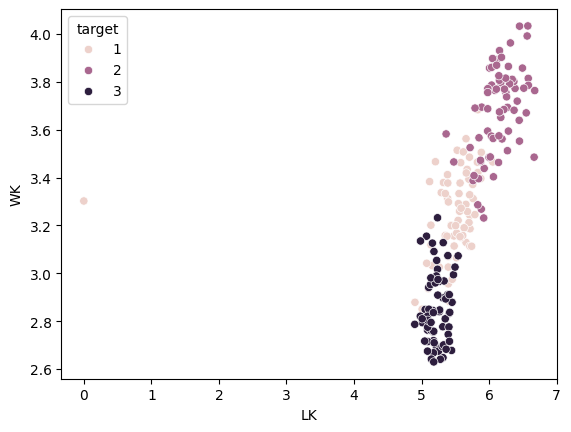

In [26]:
sns.scatterplot (data=data, x= "LK", y="WK", hue="target")

<Axes: xlabel='LKG', ylabel='A_Coef'>

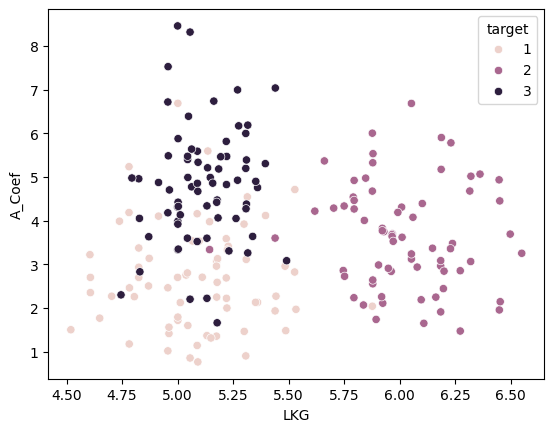

In [27]:
sns.scatterplot (data=data, x= "LKG", y="A_Coef", hue="target")

In [28]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,NaN,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,0.000,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


TRATAMIENTO DE DATOS

In [29]:
from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = SimpleImputer(missing_values=pd.NA, strategy='mean')

In [30]:
data.P = imp.fit_transform(data['P'].values.reshape(-1,1))

In [31]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.840000,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.570000,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.561531,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.940000,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.990000,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.210000,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.490000,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.100000,0.8911,0.000,3.302,2.700,5.000,1
8,16.63,15.460000,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.250000,0.8880,5.884,3.505,1.969,5.533,1


In [32]:
errordata= data[data['LK'] == 0]

In [33]:
errordata

,A,P,C,LK,WK,A_Coef,LKG,target
7,14.11,14.1,0.8911,0.0,3.302,2.7,5.0,1


In [34]:
#data.LK = data.LK.replace({0: 5.602724})

In [35]:
#data.LK = data.LK.replace({0: data['LK'].mean()})

In [36]:
#data.head(10)

NOTA: para calcular mean toma los 210 datos incluido el 0

In [37]:
imp1 = SimpleImputer(missing_values=0, strategy='mean')

In [39]:
data.LK = imp1.fit_transform(data['LK'].values.reshape(-1,1))

In [40]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.840000,0.8710,5.763000,3.312,2.221,5.220,1
1,14.88,14.570000,0.8811,5.554000,3.333,1.018,4.956,1
2,14.29,14.561531,0.9050,5.291000,3.337,2.699,4.825,1
3,13.84,13.940000,0.8955,5.324000,3.379,2.259,4.805,1
4,16.14,14.990000,0.9034,5.658000,3.562,1.355,5.175,1
5,14.38,14.210000,0.8951,5.386000,3.312,2.462,4.956,1
6,14.69,14.490000,0.8799,5.563000,3.259,3.586,5.219,1
7,14.11,14.100000,0.8911,5.629531,3.302,2.700,5.000,1
8,16.63,15.460000,0.8747,6.053000,3.465,2.040,5.877,1
9,16.44,15.250000,0.8880,5.884000,3.505,1.969,5.533,1


NOTA: La media usando SimpleImputer la calcula sobre 209 sin cosiderar los datos con 0

In [41]:
data.shape

(210, 8)

In [42]:
data.head(10)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.840000,0.8710,5.763000,3.312,2.221,5.220,1
1,14.88,14.570000,0.8811,5.554000,3.333,1.018,4.956,1
2,14.29,14.561531,0.9050,5.291000,3.337,2.699,4.825,1
3,13.84,13.940000,0.8955,5.324000,3.379,2.259,4.805,1
4,16.14,14.990000,0.9034,5.658000,3.562,1.355,5.175,1
5,14.38,14.210000,0.8951,5.386000,3.312,2.462,4.956,1
6,14.69,14.490000,0.8799,5.563000,3.259,3.586,5.219,1
7,14.11,14.100000,0.8911,5.629531,3.302,2.700,5.000,1
8,16.63,15.460000,0.8747,6.053000,3.465,2.040,5.877,1
9,16.44,15.250000,0.8880,5.884000,3.505,1.969,5.533,1


Separar variables a utilizar para algritmos no supervisados

In [44]:
features = data.iloc[:, 0:7]
target = data.iloc[:, -1]

In [45]:
features.head(10)

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.840000,0.8710,5.763000,3.312,2.221,5.220
1,14.88,14.570000,0.8811,5.554000,3.333,1.018,4.956
2,14.29,14.561531,0.9050,5.291000,3.337,2.699,4.825
3,13.84,13.940000,0.8955,5.324000,3.379,2.259,4.805
4,16.14,14.990000,0.9034,5.658000,3.562,1.355,5.175
5,14.38,14.210000,0.8951,5.386000,3.312,2.462,4.956
6,14.69,14.490000,0.8799,5.563000,3.259,3.586,5.219
7,14.11,14.100000,0.8911,5.629531,3.302,2.700,5.000
8,16.63,15.460000,0.8747,6.053000,3.465,2.040,5.877
9,16.44,15.250000,0.8880,5.884000,3.505,1.969,5.533


Normalizar datos

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_Norm= scaler.fit_transform(features)

Se necesita pasar la matriz a dataframe

In [47]:
data_Norm = pd.DataFrame(data_Norm, columns=features.columns)

In [48]:
data_Norm.describe()

,A,P,C,LK,WK,A_Coef,LKG
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444531,0.570767,0.411335,0.448043,0.381633,0.437751
std,0.274759,0.269742,0.214423,0.249340,0.269219,0.195498,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.442831,0.204533,0.223806,0.233575,0.258986
50%,0.355524,0.402893,0.593013,0.357545,0.432644,0.368474,0.346627
75%,0.634089,0.682851,0.723004,0.608530,0.664113,0.520570,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
data_Norm.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.444531,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994


StandardScaler sigue la distribución normal estándar (SND). Por lo tanto, hace que la media sea = 0 y escala los datos a la varianza unitaria. MinMaxScaler escala todas las características de datos en el rango [0, 1]

In [50]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
data_Norm1= scaler1.fit_transform(features)

In [51]:
data_Norm1 = pd.DataFrame(data_Norm1, columns=features.columns)

In [52]:
data_Norm1.describe()

,A,P,C,LK,WK,A_Coef,LKG
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-3.383537e-16,1.556427e-15,1.285744e-15,1.454921e-15,-3.383537e-16,-3.383537e-16,-8.987520e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.651922e+00,-2.668236e+00,-1.653639e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.534214e-01,-5.980791e-01,-8.313818e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.547334e-01,1.039927e-01,-2.162453e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.856208e-01,7.116771e-01,7.927596e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.064177e+00,2.006586e+00,2.366536e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [74]:
data_Norm1.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.213805,0.000061,0.302122,0.141702,-0.986152,-0.383577
1,0.011188,0.006502,0.428515,-0.170973,0.197432,-1.788166,-0.922013
2,-0.192067,0.000000,1.442383,-0.766303,0.208048,-0.667479,-1.189192
3,-0.347091,-0.477205,1.039381,-0.691604,0.319508,-0.960818,-1.229983
4,0.445257,0.328974,1.374509,0.064443,0.805159,-1.563495,-0.475356


Reducción dimensionalidad PCA

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA()
data_PCA= pca.fit_transform(data_Norm1)    #preferible utilizar datos normalizados con StandarScaler

In [59]:
data_PCA[:10,]

array([[ 3.15863379e-01,  7.86093340e-01, -6.28472098e-01,
         4.15922476e-01, -1.03316156e-01,  1.86628311e-02,
         1.35925384e-02],
       [-3.97074319e-03,  1.91579388e+00, -6.64766255e-01,
         4.29487343e-01,  5.02453225e-02,  2.16430566e-02,
         1.67334627e-03],
       [-3.00059643e-01,  1.87660218e+00,  9.16246389e-01,
         2.14034149e-01,  6.95566666e-02, -2.32975510e-01,
         2.26856665e-01],
       [-5.92459628e-01,  1.93119695e+00,  5.04136589e-01,
         2.23906100e-01,  7.26628805e-02,  2.33530566e-01,
         1.74894520e-02],
       [ 1.10266004e+00,  2.06795630e+00,  6.14410888e-02,
         1.38034929e-01,  2.20275811e-02,  5.52351758e-02,
        -1.32618689e-03],
       [-3.37497081e-01,  1.63706428e+00,  4.43176353e-01,
         9.42586684e-02, -9.91913059e-04, -2.07413521e-02,
         2.72252971e-03],
       [-1.46990516e-01,  4.36838944e-01,  3.03700866e-01,
         1.10820331e-01, -6.70781646e-02, -6.25905098e-02,
         1.9028661

<Axes: title={'center': 'PCA'}>

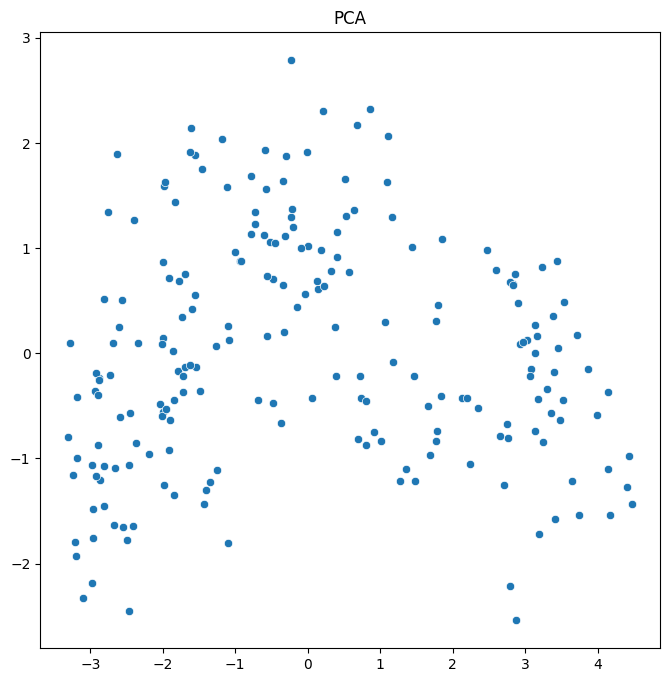

In [60]:
plt.figure(figsize=(8,8))
plt.title("PCA")
sns.scatterplot(x=data_PCA[:,0],y=data_PCA[:,1])

In [61]:
print(pca.explained_variance_ratio_)

[7.18795922e-01 1.70834962e-01 9.67872944e-02 9.81373627e-03
 2.79332662e-03 8.20470925e-04 1.54288040e-04]


Text(0, 0.5, 'Cumulative explained variables')

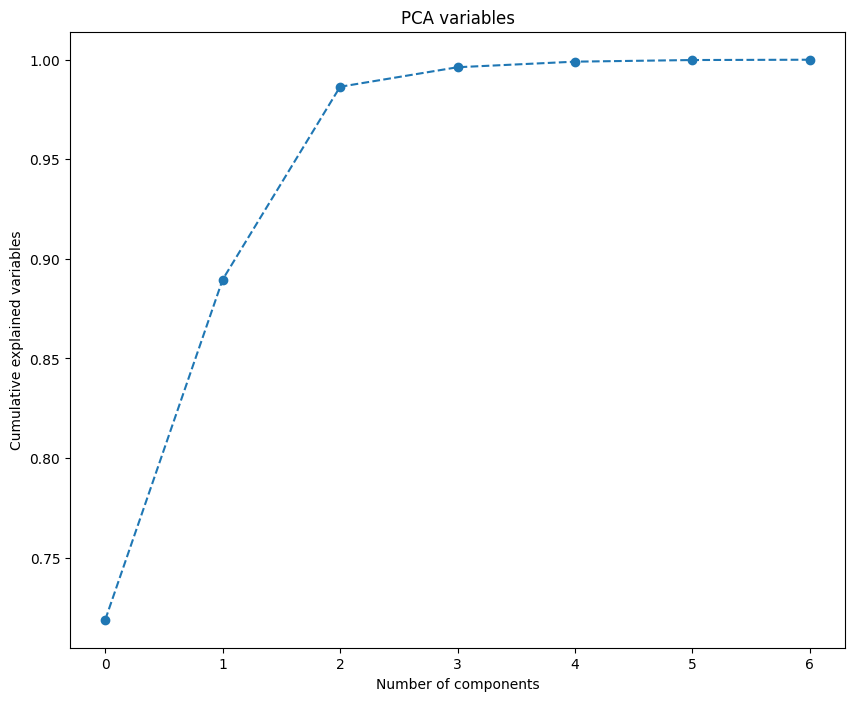

In [62]:
plt.figure(figsize=(10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o',linestyle = '--')
plt.title('PCA variables')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variables')

In [67]:
pca = PCA(n_components= 2)
data_PCA= pca.fit_transform(data_Norm1)

In [68]:
print(pca.explained_variance_ratio_)

[0.71879592 0.17083496]


ALGORITMO